In [52]:
import sys
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
h5_files = glob.glob(os.path.join("..\\output", "*.h5"))

eta_hat, phi_hat, Hs, Tp, modes, time, length, x = None, None, None, None, None, None, None, None

for i, file in enumerate(h5_files):
    with h5py.File(file, "r") as data:
        eta_hat = data["eta_hat"][:]
        phi_hat = data["phi_hat"][:]
        Hs = data["Hs"][:]
        Tp = data["Tp"][:]
        time = data["time"][:]

        modes = data.attrs["modes"]
        length = data.attrs["length"]
        x = np.linspace(0, length, 2*modes)

    break

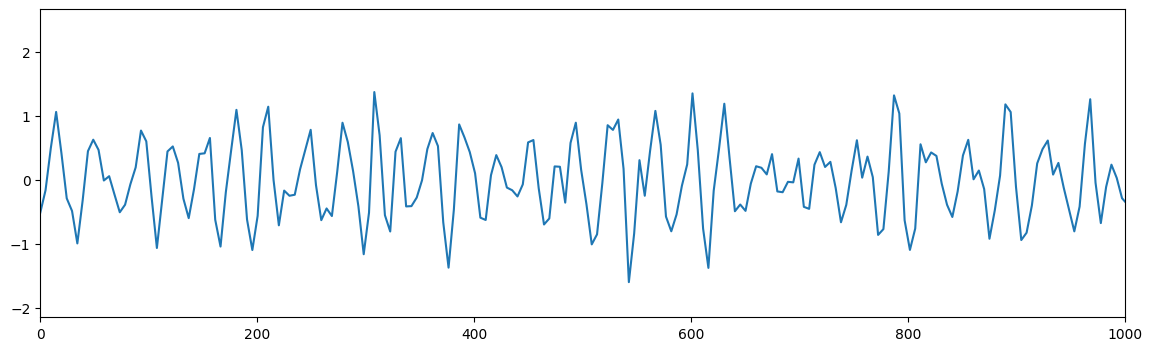

(513,) (1539,)


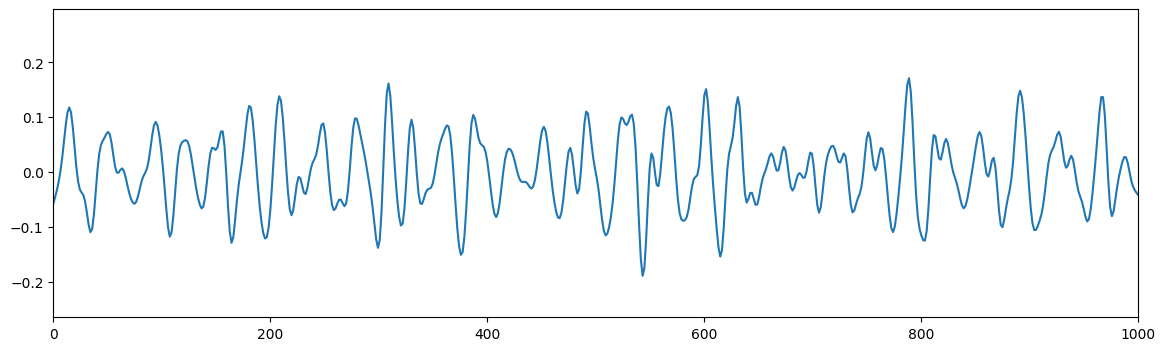

In [ ]:

plt.figure(figsize=(14, 4))
plt.plot(x, irfft(eta_hat[0, 0, :]))
plt.xlim(0, 1000)
plt.show()

eta_hat_pad = np.pad(eta_hat[0, 0, :], (0, 2 * eta_hat.shape[2]))/3
x_pad = np.linspace(0, length, (eta_hat_pad.shape[0]-1)*2)

print(eta_hat[0, 0, :].shape, eta_hat_pad.shape)

plt.figure(figsize=(14, 4))
plt.plot(x_pad, irfft(eta_hat_pad))
plt.xlim(0, 1000)
plt.show()

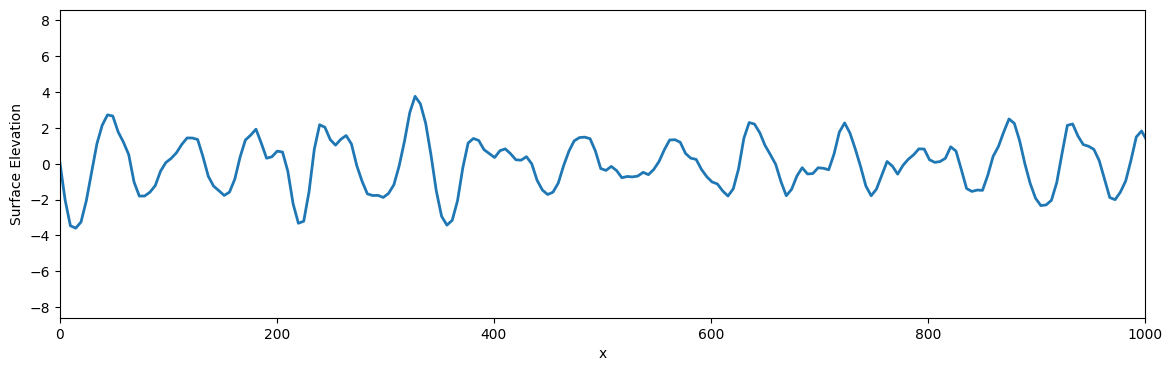

In [65]:
index = 10

fig, ax = plt.subplots(figsize=(14, 4))
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, 1000)
ax.set_ylim(-np.max(np.abs(irfft(eta_hat[index, :, :]))) * 1.1, np.max(np.abs(irfft(eta_hat[index, :, :]))) * 1.1)
ax.set_xlabel("x")
ax.set_ylabel("Surface Elevation")

def update(frame):
    eta = irfft(eta_hat[index, frame, :])
    line.set_data(x[:len(eta)], eta)
    return line,

ani = FuncAnimation(fig, update, frames=100, blit=True) #eta_hat.shape[1]
ani.save("wave_evolution.gif", writer="pillow", fps=10)

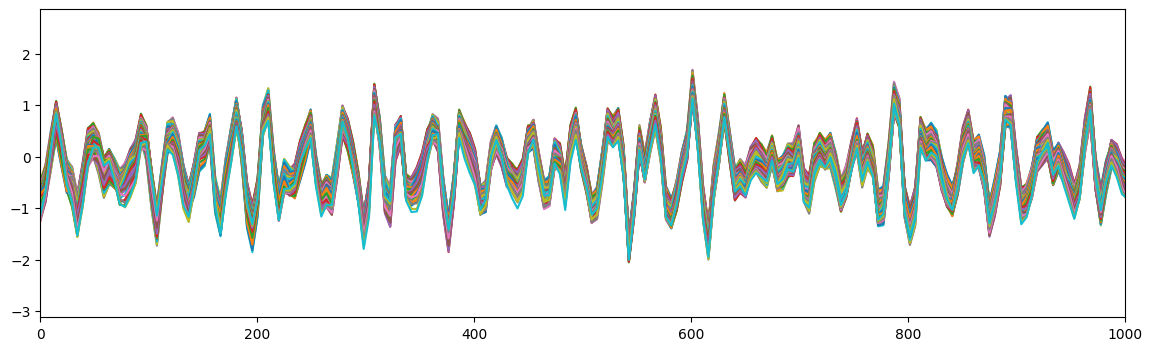

In [62]:
plt.figure(figsize=(14, 4))
for i in range(100):
    plt.plot(x, irfft(eta_hat[0, i*10, :]))
plt.xlim(0, 1000)
plt.show()